In [306]:
import pandas as pd
from tensorflow import keras
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [307]:
#Reading csv file
df=pd.read_csv("Google_Stock_Price_Train.csv",index_col="Date", parse_dates=True)

In [308]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [309]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [310]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
2016-12-29,783.33,785.93,778.92,782.79,"744,300"
2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


In [311]:
df1=df.reset_index()['Close']

<AxesSubplot:xlabel='Date'>

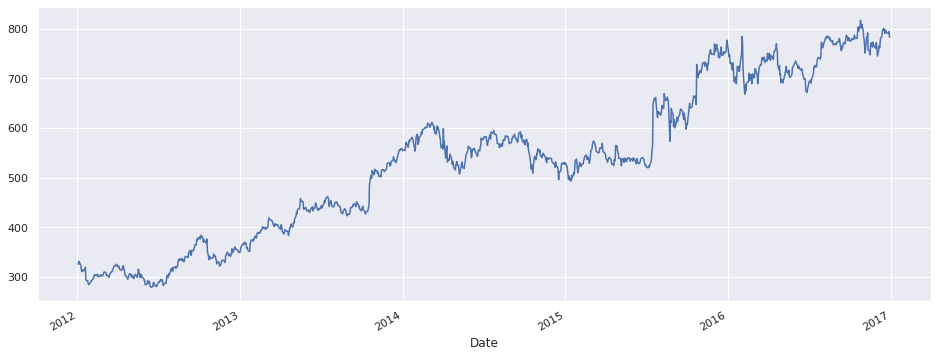

In [312]:
df['Open'].plot(figsize=(16,6))

In [313]:
df1

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: object

In [314]:
df["Close"]=df["Close"].str.replace(',','').astype(float)


In [315]:
df["Volume"]=df["Volume"].str.replace(',','').astype(float)

In [316]:
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


<AxesSubplot:xlabel='Date'>

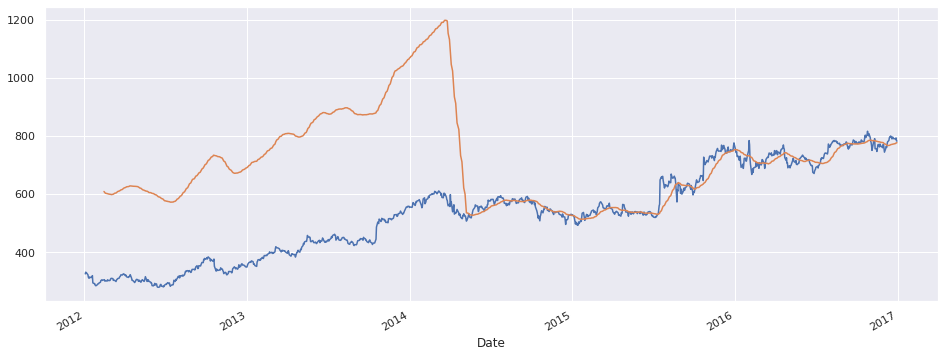

In [317]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

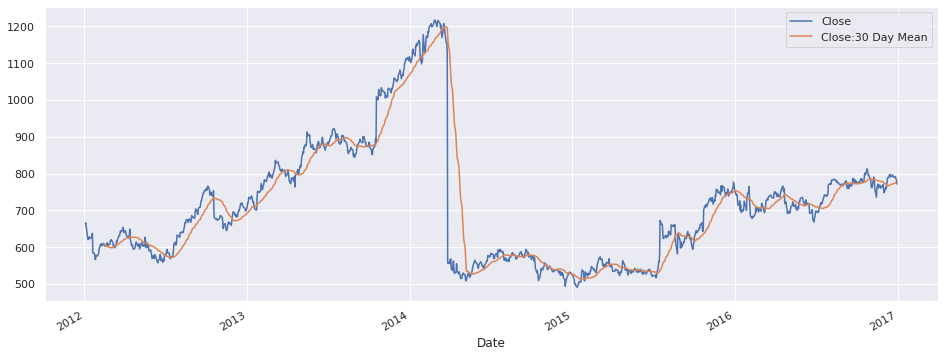

In [318]:
df['Close:30 Day Mean']=df['Close'].rolling(window=30).mean()
df[['Close','Close:30 Day Mean']].plot(figsize=(16,6))

In [319]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)


In [320]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [321]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train), np.array(y_train)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [326]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [322]:
#Build RNN model
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras
#from keras.model import Sequential
from tensorflow.keras.models import Sequential 
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout

In [323]:
model=keras.Sequential()

In [324]:
#Predicting Demand

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))


In [325]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 23s 296ms/step - loss: 0.0433
Epoch 2/100
38/38 [==============================] - 12s 308ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 11s 300ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 11s 296ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 12s 303ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 11s 297ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 11s 302ms/step - loss: 0.0064
Epoch 8/100
38/38 [==============================] - 12s 302ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 12s 326ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 13s 338ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 12s 314ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 13s 334ms/step - loss: 0.0039
E

38/38 [==============================] - 11s 284ms/step - loss: 0.0015
Epoch 99/100
38/38 [==============================] - 11s 283ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 11s 288ms/step - loss: 0.0015


In [327]:
dataset_test=pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date", parse_dates=True)

In [328]:
real_stock_price=dataset_test.iloc[:, 1:2].values

In [329]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [331]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [332]:
dataset_test["Volume"]=dataset_test["Volume"].str.replace(',','').astype(float)

In [333]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [334]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [337]:
dataset_total=pd.concat((df['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=sc.inverse_transform(pred_price)

In [338]:
pred_price=pd.DataFrame(pred_price)
pred_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


In [341]:
X_test.shape

(20, 60, 1)

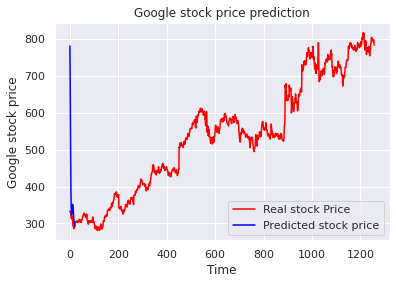

In [342]:
plt.plot(real_stock_price, color="red", label="Real stock Price")
plt.plot(pred_price, color="blue", label="Predicted stock price")
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()